### [Visualizing the distribution of a dataset](https://seaborn.pydata.org/index.html)

## Visualizing the distribution of a dataset
### - Plotting univariate distributions
### - Plotting bivariate distributions
### - Visualizing pairwise relationships in a dataset

Getting a sense for how the variables are distributed. \
This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. 

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set(color_codes='set')

### Plotting univariate distributions
The most convenient way to take a quick look at a univariate distribution in seaborn is the [distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) function. By default, this will draw a [histogram](https://en.wikipedia.org/wiki/Histogram) and fit a [kernel density estimate (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation).

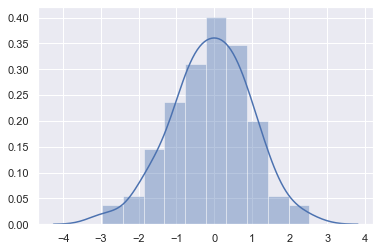

In [9]:
x=np.random.normal(size=100)
sns.distplot(x)

#### Histogram

Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

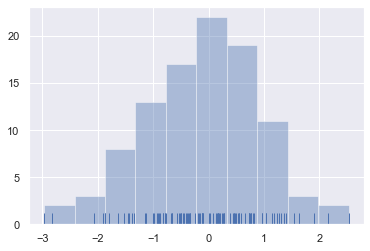

In [12]:
sns.distplot(x, kde=False, rug=True);

When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

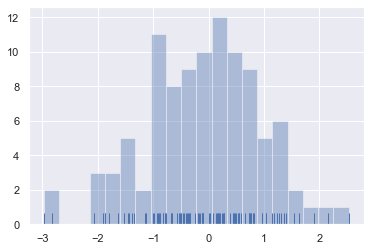

In [14]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### Kernel density estimation
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

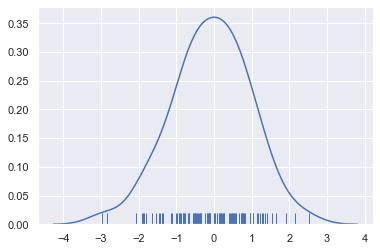

In [18]:
sns.distplot(x, hist=False, rug=True)

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

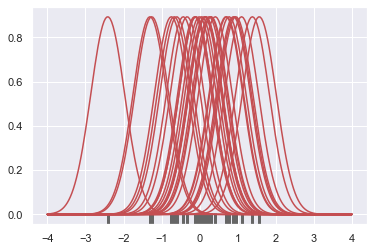

In [19]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.)
support = np.linspace(-4,4,200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')
    
sns.rugplot(x, color='.4', linewidth=3)

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

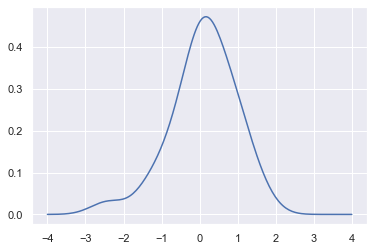

In [23]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

We can see that if we use the kdeplot() function in seaborn, we get the same curve. This function is used by distplot(), but it provides a more direct interface with easier access to other options when you just want the density estimate:

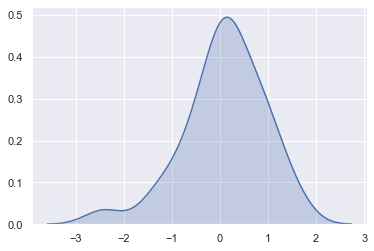

In [24]:
sns.kdeplot(x, shade=True)